In [1]:
#loading datfarme
import pandas as pd
dataframe = pd.read_csv("datasheet_final.csv")

In [2]:
#encoding textual shape descriptor column
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Color' column
shape_Enc = label_encoder.fit_transform(dataframe['shape descriptor'])

dataframe['shape descriptor'] = shape_Enc

In [3]:
#encoding textual hex color of flower column
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Color' column
color_Enc = label_encoder.fit_transform(dataframe['hex color of flower'])

dataframe['hex color of flower'] = color_Enc

In [4]:
#dataframe after encoding
dataframe

,slimness,leaf size,shape descriptor,hex color of flower,Name
0,2.476190,29.120000,2,1,Welan
1,2.282609,32.200000,2,1,Welan
2,2.542857,20.766667,2,1,Welan
3,2.195122,24.600000,2,1,Welan
4,3.300000,19.800000,0,0,Bora
...,...,...,...,...,...
65,2.500000,15.000000,2,1,Welan
66,2.155556,29.100000,2,1,Welan
67,2.022222,27.300000,2,1,Welan
68,2.615385,26.520000,2,1,Welan


In [5]:
dataset = dataframe.values
dataset.shape

(70, 5)

In [6]:
from sklearn.preprocessing import OneHotEncoder
#for x
X = dataset[:,0:4].astype(float)
#for y
Y = dataset[:,4]
dataframe['Name'] = dataframe['Name'].astype('category')  
# Assigning numerical values and storing it in another columns 
dataframe['Gen_new'] = dataframe['Name'].cat.codes  
# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
# Passing encoded columns 
dummy_y = pd.DataFrame(enc.fit_transform(dataframe[['Gen_new']]).toarray()) 

In [7]:
from sklearn.model_selection import train_test_split
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=3)

In [8]:
from keras.models import Model   
from keras.layers import *

#Defining the model
inputs = Input(shape=(4,)) # input tensor
hidden1 = Dense(units=8, activation='relu')(inputs) # layer 1
hidden2 = Dense(units=8, activation='relu')(hidden1)  # layer 2
hidden3 = Dense(units=8, activation='relu')(hidden2)  # layer 3
outputs = Dense(units=3, activation='softmax')(hidden2)  # output layer

# Initializing and training the classifier
classifier = Model(inputs, outputs)


In [9]:

from keras import optimizers
classifier.compile(optimizer = 'SGD', loss='poisson', metrics=['accuracy'])

In [10]:
x_val = X_train[:14]
partial_x_train = X_train[14:]
y_val = y_train[:14]
partial_y_train = y_train[14:]

In [11]:
print(x_val.shape)
print(partial_x_train.shape)
print(y_val.shape)
print(partial_y_train.shape)

(14, 4)
(42, 4)
(14, 3)
(42, 3)


In [12]:
X_train.shape

(56, 4)

In [13]:
y_train.shape

(56, 3)

In [14]:
history = classifier.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=7,
validation_data=(x_val, y_val))

Epoch 1/20
6/6 [==============================] - 1s 43ms/step - loss: 1.7154 - accuracy: 0.2857 - val_loss: 1.0013 - val_accuracy: 0.1429
Epoch 2/20
6/6 [==============================] - 0s 6ms/step - loss: 0.9461 - accuracy: 0.0476 - val_loss: 0.8042 - val_accuracy: 0.0714
Epoch 3/20
6/6 [==============================] - 0s 6ms/step - loss: 0.7806 - accuracy: 0.1667 - val_loss: 0.7386 - val_accuracy: 0.2143
Epoch 4/20
6/6 [==============================] - 0s 7ms/step - loss: 0.7504 - accuracy: 0.0952 - val_loss: 0.7314 - val_accuracy: 0.2143
Epoch 5/20
6/6 [==============================] - 0s 7ms/step - loss: 0.7306 - accuracy: 0.3095 - val_loss: 0.7318 - val_accuracy: 0.3571
Epoch 6/20
6/6 [==============================] - 0s 5ms/step - loss: 0.7231 - accuracy: 0.3333 - val_loss: 0.7394 - val_accuracy: 0.3571
Epoch 7/20
6/6 [==============================] - 0s 6ms/step - loss: 0.7187 - accuracy: 0.3810 - val_loss: 0.7296 - val_accuracy: 0.3571
Epoch 8/20
6/6 [=================

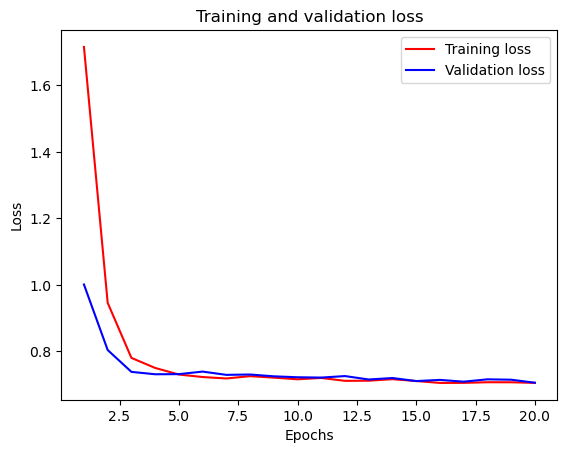

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
#early stopping
from keras.models import Model   
from keras.layers import *

#Defining the model
inputs = Input(shape=(4,)) # input tensor
hidden1 = Dense(units=8, activation='relu')(inputs) # layer 1
hidden2 = Dense(units=8, activation='relu')(hidden1)  # layer 2
hidden3 = Dense(units=8, activation='relu')(hidden2)  # layer 3
outputs = Dense(units=3, activation='softmax')(hidden2)  # output layer

# Initializing and training the classifier
classifier = Model(inputs, outputs)

In [18]:
from keras import optimizers
classifier.compile(optimizer = 'SGD', loss='poisson', metrics=['accuracy'])

In [20]:
#early stopping at 7th epoch
classifier.fit(partial_x_train,
partial_y_train,
epochs=7,
batch_size=7,
validation_data=(x_val, y_val))

Epoch 1/7
6/6 [==============================] - 1s 40ms/step - loss: 0.8481 - accuracy: 0.1190 - val_loss: 0.7362 - val_accuracy: 0.3571
Epoch 2/7
6/6 [==============================] - 0s 6ms/step - loss: 0.7222 - accuracy: 0.2143 - val_loss: 0.6999 - val_accuracy: 0.2143
Epoch 3/7
6/6 [==============================] - 0s 6ms/step - loss: 0.6845 - accuracy: 0.4762 - val_loss: 0.6911 - val_accuracy: 0.5714
Epoch 4/7
6/6 [==============================] - 0s 6ms/step - loss: 0.6703 - accuracy: 0.5952 - val_loss: 0.6831 - val_accuracy: 0.6429
Epoch 5/7
6/6 [==============================] - 0s 7ms/step - loss: 0.6627 - accuracy: 0.6429 - val_loss: 0.6666 - val_accuracy: 0.5714
Epoch 6/7
6/6 [==============================] - 0s 6ms/step - loss: 0.6424 - accuracy: 0.6190 - val_loss: 0.6533 - val_accuracy: 0.6429
Epoch 7/7
6/6 [==============================] - 0s 7ms/step - loss: 0.6332 - accuracy: 0.6667 - val_loss: 0.6442 - val_accuracy: 0.6429


In [26]:
results = classifier.evaluate(X, dummy_y)

3/3 [==============================] - 0s 6ms/step - loss: 0.6275 - accuracy: 0.7143


In [27]:
results

[0.6275104880332947, 0.7142857313156128]

In [34]:
from keras.models import load_model

# save model
classifier.save_weights('best_tree_classifier.h5')